In [1]:
%matplotlib inline

In [2]:
# The idea here is to reproduce the plots of the GC2 
# coordinates (T and U) for the Chi-Chi fault model. 
# This is panels B and D in Figure 6 of: 
#   Spudich, Paul and Chiou, Brian, 2015, Strike-parallel 
#   and strike-normal coordinate system around geometrically 
#   complicated rupture traces—Use by NGA-West2 and further 
#   improvements: U.S. Geological Survey Open-File Report 
#   2015-1028, 20 p., http://dx.doi.org/10.3133/ofr20151028.

import numpy as np
import time as time

import matplotlib.pyplot as plt
import pandas as pd
import openquake.hazardlib.geo as geo

import shakemap.grind.fault as fault
from  shakemap.grind.distance import get_distance
from shakemap.grind.source import Source
from shakemap.utils.timeutils import ShakeDateTime

In [3]:
# Read in the Chi Chi fault data: 
f = '../tests/data/0137A.POL'
i0 = np.arange(0, 9*11*3, 11)
i1 = i0 + 10
cs = list(zip(i0, i1))
df = pd.read_fwf(f, cs, skiprows = 2, nrows = 5, header = None)
mat = df.as_matrix()
ix = np.arange(0, 9*3, 3)
iy = ix + 1
iz = ix + 2
x0 = mat[0, ix]
x1 = mat[1, ix]
x2 = mat[2, ix]
x3 = mat[3, ix]
y0 = mat[0, iy]
y1 = mat[1, iy]
y2 = mat[2, iy]
y3 = mat[3, iy]
# Depth, positive down
z0 = np.abs(mat[0, iz])
z1 = np.abs(mat[1, iz])
z2 = np.abs(mat[2, iz])
z3 = np.abs(mat[3, iz])
epilat = 23.87
epilon = 120.75
proj = geo.utils.get_orthographic_projection(epilon-1, epilon+1, epilat+1, epilat-1)
lon0,lat0 = proj(x0, y0, reverse = True)
lon1,lat1 = proj(x1, y1, reverse = True)
lon2,lat2 = proj(x2, y2, reverse = True)
lon3,lat3 = proj(x3, y3, reverse = True)
flt = fault.Fault.fromVertices(lon0, lat0, z0, lon1, lat1, z1, lon2, lat2, z2, lon3, lat3, z3)
flt._segment_index = [0]*len(lon0)
# Make a source object; most of the 'event' values don't matter
event = {'lat': 0,  'lon': 0, 'depth':0, 'mag': 7.6, 
         'id':'', 'locstring':'', 'type':'U', 
         'time':ShakeDateTime.utcfromtimestamp(int(time.time())), 
         'timezone':'UTC'}
source = Source(event, flt)

In [4]:
# Grid of sites
buf = 0.5
lat = np.linspace(np.nanmin(flt._lat)-buf, np.nanmax(flt._lat)+buf, 350)
lon = np.linspace(np.nanmin(flt._lon)-buf, np.nanmax(flt._lon)+buf, 350)
lons, lats = np.meshgrid(lon, lat)
dep = np.zeros_like(lons)
x,y = proj(lon, lat)
fltx,flty = proj(flt._lon, flt._lat)

In [5]:
# Calculate U and T
dtypes = ['U', 'T']
dists = get_distance(dtypes, lats, lons, dep, source)

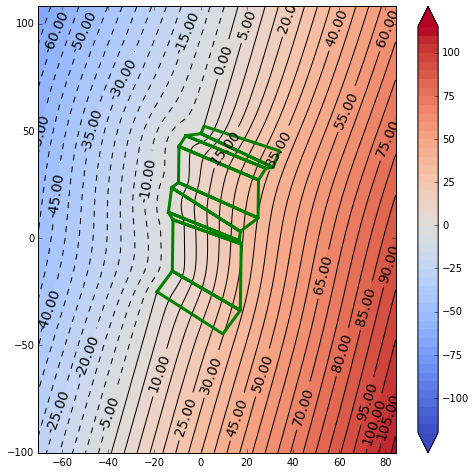

In [6]:
# Figure 6B
fig = plt.figure(figsize=(8,8))
CS = plt.contourf(x, y, dists['T'], 
                  cmap = plt.cm.coolwarm,
                  levels = np.arange(-120, 120, 5),
                  extend = "both")
CS2 = plt.contour(CS, hold = 'on', colors = 'k')
plt.clabel(CS2, fmt='%2.2f', colors='k', fontsize=14)
plt.plot(fltx, flty, color = 'g', linewidth = 3)
plt.xlim([np.min(x), np.max(x)])
plt.ylim([np.min(y), np.max(y)])
cbar = plt.colorbar(CS)

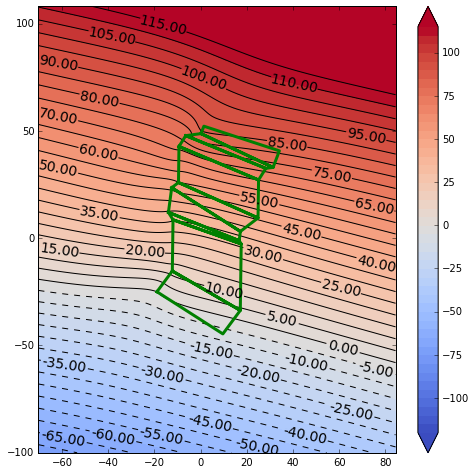

In [7]:
# Figure 6D
fig = plt.figure(figsize=(8,8))
CS = plt.contourf(x, y, dists['U'], 
                  cmap = plt.cm.coolwarm,
                  levels = np.arange(-120, 120, 5),
                  extend = "both")
CS2 = plt.contour(CS, hold = 'on', colors = 'k')
plt.clabel(CS2, fmt='%2.2f', colors='k', fontsize=14)
plt.plot(fltx, flty, color = 'g', linewidth = 3)
plt.xlim([np.min(x), np.max(x)])
plt.ylim([np.min(y), np.max(y)])
cbar = plt.colorbar(CS)

In [8]:
# San Fernando
x0 = np.array([7.1845, 7.8693])
y0 = np.array([-10.3793, -16.2096])
z0 = np.array([3.0000, 0.0000])
x1 = np.array([-7.8506, -7.5856])
y1 = np.array([-4.9073, -12.0682])
z1 = np.array([3.0000, 0.0000])
x2 = np.array([-4.6129, -5.5149])
y2 = np.array([3.9887, -4.3408])
z2 = np.array([16.0300, 8.0000])
x3 = np.array([10.4222, 9.9400])
y3 = np.array([-1.4833, -8.4823])
z3 = np.array([16.0300, 8.0000])

epilat = 34.44000
epilon = -118.41000
proj = geo.utils.get_orthographic_projection(epilon-1, epilon+1, epilat+1, epilat-1)
lon0,lat0 = proj(x0, y0, reverse = True)
lon1,lat1 = proj(x1, y1, reverse = True)
lon2,lat2 = proj(x2, y2, reverse = True)
lon3,lat3 = proj(x3, y3, reverse = True)

flt = fault.Fault.fromVertices(lon0, lat0, z0, lon1, lat1, z1, lon2, lat2, z2, lon3, lat3, z3)
flt._segment_index = [0, 1]
# Make a source object; most of the 'event' values don't matter
event = {'lat': 0,  'lon': 0, 'depth':0, 'mag': 6.61, 
         'id':'', 'locstring':'', 'type':'U', 
         'time':ShakeDateTime.utcfromtimestamp(int(time.time())), 
         'timezone':'UTC'}
source = Source(event, flt)

In [9]:
# Grid of sites
buf = 0.25
lat = np.linspace(np.nanmin(flt._lat)-buf, np.nanmax(flt._lat)+buf, 350)
lon = np.linspace(np.nanmin(flt._lon)-buf, np.nanmax(flt._lon)+buf, 350)
lons, lats = np.meshgrid(lon, lat)
dep = np.zeros_like(lons)
x,y = proj(lon, lat)
fltx,flty = proj(flt._lon, flt._lat)

In [10]:
# Calculate U and T
dtypes = ['U', 'T']
dists = get_distance(dtypes, lats, lons, dep, source)

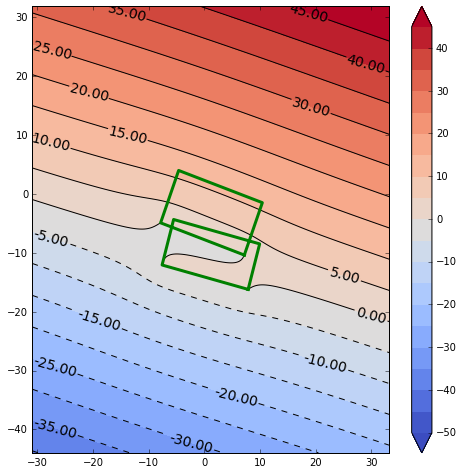

In [11]:
# Figure 9A
fig = plt.figure(figsize=(8,8))
CS = plt.contourf(x, y, dists['T'], 
                  cmap = plt.cm.coolwarm,
                  levels = np.arange(-50, 50, 5),
                  extend = "both")
CS2 = plt.contour(CS, hold = 'on', colors = 'k')
plt.clabel(CS2, fmt='%2.2f', colors='k', fontsize=14)
plt.plot(fltx, flty, color = 'g', linewidth = 3)
plt.xlim([np.min(x), np.max(x)])
plt.ylim([np.min(y), np.max(y)])
cbar = plt.colorbar(CS)

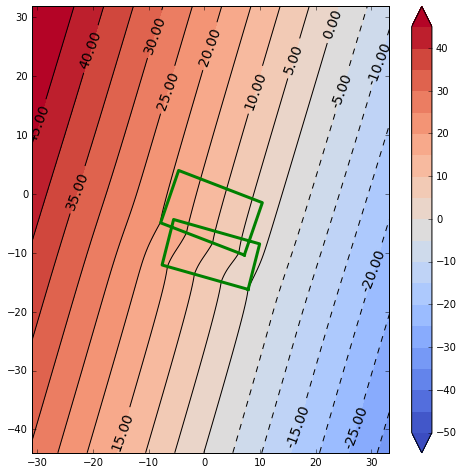

In [12]:
# Figure 6D
fig = plt.figure(figsize=(8,8))
CS = plt.contourf(x, y, dists['U'], 
                  cmap = plt.cm.coolwarm,
                  levels = np.arange(-50, 50, 5),
                  extend = "both")
CS2 = plt.contour(CS, hold = 'on', colors = 'k')
plt.clabel(CS2, fmt='%2.2f', colors='k', fontsize=14)
plt.plot(fltx, flty, color = 'g', linewidth = 3)
plt.xlim([np.min(x), np.max(x)])
plt.ylim([np.min(y), np.max(y)])
cbar = plt.colorbar(CS)

In [13]:
methods = dtypes
lat = lats
lon = lons
dep = dep
use_median_distance=True

In [14]:
import copy
import warnings
import itertools as it
import os

# third party imports
import numpy as np
import pandas as pd
import re
import scipy.interpolate as spint

from openquake.hazardlib.geo import geodetic
from openquake.hazardlib.geo.utils import get_orthographic_projection
from openquake.hazardlib.gsim.base import GMPE
from openquake.hazardlib.gsim import base

# local imports
from shakemap.utils.exception import ShakeMapException
from shakemap.utils.ecef import latlon2ecef
from shakemap.utils.vector import Vector
from shakemap.grind.fault import get_quad_length
from shakemap.grind.source import rake_to_mech

In [15]:
fault = source.getFault()
hypo = source.getHypo()
if fault is not None:
    quadlist = fault.getQuadrilaterals()
else:
    quadlist = None

# Dictionary for holding the distances
distdict = dict()

if not isinstance(methods, list):
    methods = [methods]

methods_available = set(
    ['repi', 'rhypo', 'rjb', 'rrup', 'rx', 'ry', 'ry0', 'U', 'T'])
if not set(methods).issubset(methods_available):
    raise NotImplementedError(
        'One or more requested distance method is not '
        'valid or is not implemented yet')

if (lat.shape == lon.shape) and (lat.shape == dep.shape):
    pass
else:
    raise ShakeMapException('lat, lon, and dep must have the same shape.')

oldshape = lon.shape

if len(oldshape) == 2:
    newshape = (oldshape[0] * oldshape[1], 1)
else:
    newshape = (oldshape[0], 1)

if ('rrup' in methods) or ('rjb' in methods):
    x, y, z = latlon2ecef(lat, lon, dep)
    x.shape = newshape
    y.shape = newshape
    z.shape = newshape
    sites_ecef = np.hstack((x, y, z))

# Define a projection that spands sites and fault
if fault is None:
    all_lat = lat
    all_lon = lon
else:
    all_lat = np.append(lat, fault.getLats())
    all_lon = np.append(lon, fault.getLons())

west = np.nanmin(all_lon)
east = np.nanmax(all_lon)
south = np.nanmin(all_lat)
north = np.nanmax(all_lat)
proj = get_orthographic_projection(west, east, north, south)

In [16]:
totweight = np.zeros(newshape, dtype=lon.dtype)
GC2T = np.zeros(newshape, dtype=lon.dtype)
GC2U = np.zeros(newshape, dtype=lon.dtype)
segind = fault._getSegmentIndex()
segindnp = np.array(segind)
uind = np.unique(segind)
nseg = len(uind)
iq0 = np.zeros(nseg, dtype='int16')
iq1 = np.zeros(nseg, dtype='int16')
for k in uind:
    ii = [i for i, j in enumerate(segind) if j == uind[k]]
    iq0[k] = int(np.min(ii))
    iq1[k] = int(np.max(ii))

it_seg = it.product(it.combinations(uind, 2),
                    it.product([0, 1], [0, 1]))
dist_save = 0

In [17]:
for k in it_seg:
    s0ind = k[0][0]
    s1ind = k[0][1]
    p0ind = k[1][0]
    p1ind = k[1][1]
    if p0ind == 0:
        P0 = quadlist[iq0[s0ind]][0]
    else:
        P0 = quadlist[iq1[s0ind]][1]
    if p1ind == 0:
        P1 = quadlist[iq1[s1ind]][0]
    else:
        P1 = quadlist[iq0[s1ind]][1]

    dist = geodetic.distance(P0.longitude, P0.latitude, 0.0,
                             P1.longitude, P1.latitude, 0.0)
    if dist > dist_save:
        dist_save = dist
        A0 = P0
        A1 = P1


In [18]:
print(A0, A1)
print(A0.azimuth(A1))
fault.getStrike()

<Latitude=34.399908, Longitude=-118.483596, Depth=3.0000> <Latitude=34.298263, Longitude=-118.312363, Depth=-0.0000>
125.667121259


-72.454717872600625

In [19]:
A0.depth = 0
A1.depth = 0
p_origin = Vector.fromPoint(A0)
a0 = Vector.fromPoint(A0)
a1 = Vector.fromPoint(A1)
ahat = (a1 - a0).norm()

# Loop over traces
e_j = np.zeros(nseg)
b_prime = [None] * nseg
for j in range(nseg):
    P0 = quadlist[iq0[j]][0]
    P1 = quadlist[iq1[j]][1]
    P0.depth = 0
    P1.depth = 0
    p0 = Vector.fromPoint(P0)
    p1 = Vector.fromPoint(P1)
    b_prime[j] = p1 - p0
    e_j[j] = ahat.dot(b_prime[j])
E = np.sum(e_j)

# List of discordancy
dc = [np.sign(a) * np.sign(E) for a in e_j]
b = Vector(0, 0, 0)
for j in range(nseg):
    b.x = b.x + b_prime[j].x * dc[j]
    b.y = b.y + b_prime[j].y * dc[j]
    b.z = b.z + b_prime[j].z * dc[j]
    bhat = b.norm()

In [20]:
e_j

array([-15430.27012952, -14999.78104006])

In [21]:
E

-30430.051169587197

In [23]:
bhat.dot(ahat)

-0.95015559484294465